
1. Написать python скрипт для построения графика, демонстрирующего динамику усвоения русского языка как родного детьми в возрасте от 8 до 36 месяцев, используя датасет administration_data.csv.

График должен демонстрировать зависимость возраста и количества воспринимаемых и порождаемых слов.

Построенный график должен отвечать требованиям:
- График разбит на секции в зависимости от возрастной группы с шагом в 6 месяцев.
- По оси Х расположен возраст детей; по оси Y - количество воспринимаемых/порождаемых слов в единицах с шагом в 100.
- На графике должно быть четко разделимые 4 линии (девочки-мальчики, восприятие-порождение)
- На фоне должен быть горизонтальный полупрозрачный mesh.
- На графике должны присутствовать: название графика; названия xticks, yticks; легенда.

2. С помощью графика ответить на вопрос: в каком возрасте наступает момент «слияния» восприятия и порождения слов?

Для удобства данные нужно будет аггрегировать с усреднением

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('administration_data.csv')
#df2 = df.groupby(['gender', 'age']).mean()
#df[df['age'] >= 20]

In [2]:
df.drop(columns=['data_id', 'mom_ed', 'form', 'language'], inplace=True)

In [3]:
boys = df[df['gender'] == 'Male'].groupby(['age']).mean()
girls = df[df['gender'] == 'Female'].groupby(['age']).mean()

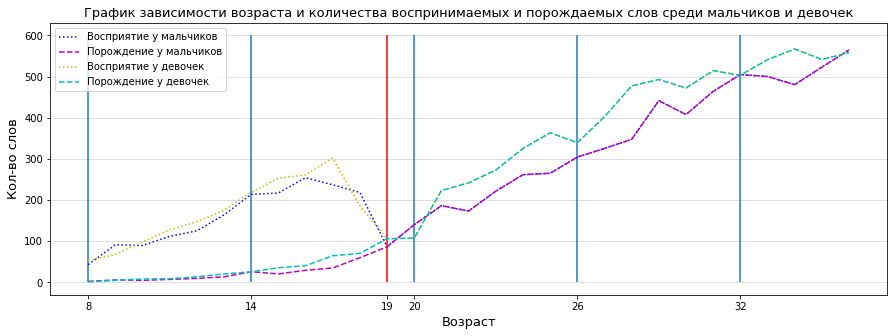

In [4]:
plt.figure(figsize=(15,5))
plt.title('График зависимости возраста и количества воспринимаемых и порождаемых слов среди мальчиков и девочек', fontsize=13)

plt.plot(boys['comprehension'], ':b', label='Восприятие у мальчиков')
plt.plot(boys['production'], '--m', label='Порождение у мальчиков')
plt.plot(girls['comprehension'], ':y', label='Восприятие у девочек')
plt.plot(girls['production'], '--c', label='Порождение у девочек')

plt.grid(alpha=0.5, axis='y')
plt.xlabel('Возраст', fontsize=13)
plt.ylabel('Кол-во слов', fontsize=13)
plt.xticks([8, 14, 19, 20, 26, 32])
plt.vlines([8, 14, 20, 26, 32], ymin=0, ymax=600)
plt.vlines([19], ymin=0, ymax=600, colors='r')

plt.legend()

Момент «cлияния» восприятия и порождения слов наступает в возрасте 19 месяцев.